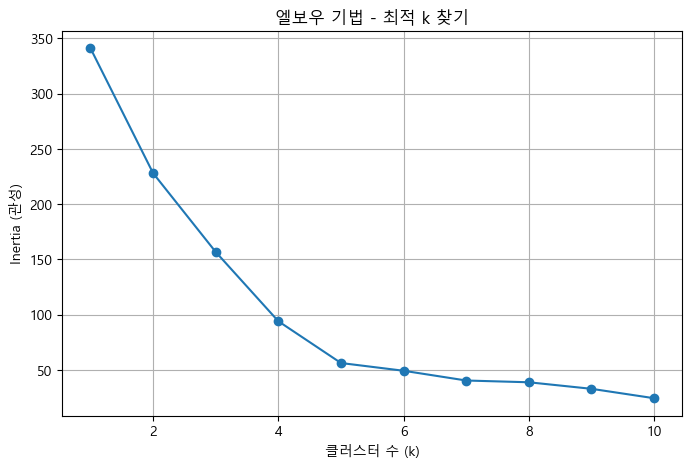

Silhouette Score (테스트 데이터): 0.5666


C:\Users\ez\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


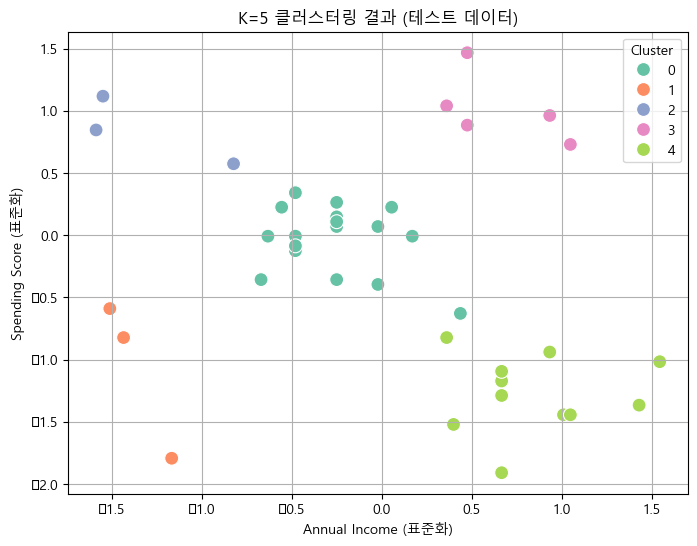

 클러스터별 요약 통계:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                     55.30                   49.52
1                     26.30                   20.91
2                     25.73                   79.36
3                     86.54                   82.13
4                     88.20                   17.11
 k=5에서 엘보우가 뚜렷하게 관찰되어, 5개의 클러스터로 분류하는 것이 적절하다고 판단


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

plt.rcParams['font.family'] = 'Malgun Gothic'

# 1. 데이터 로드
df = pd.read_csv("Mall_Customers.csv")

# 2. Annual Income, Spending Score 열만 사용
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 3. 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 학습/테스트 데이터 분할 (8:2)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# 5. 엘보우 기법을 통한 최적의 k 찾기
inertia_list = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_list, marker='o')
plt.title('엘보우 기법 - 최적 k 찾기')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('Inertia (관성)')
plt.grid(True)
plt.show()

# 6. 최적 k 선택 후 모델 학습
optimal_k = 5  # 엘보우 지점에서 적절한 k 선택 (그래프 보고 수정 가능)
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_final.fit(X_train)

# 7. 테스트 데이터 클러스터 예측
test_labels = kmeans_final.predict(X_test)

# 8. Silhouette Score 계산
sil_score = silhouette_score(X_test, test_labels)
print(f"Silhouette Score (테스트 데이터): {sil_score:.4f}")

# 9. 테스트 데이터 시각화
X_test_df = pd.DataFrame(X_test, columns=['Income_scaled', 'Score_scaled'])
X_test_df['Cluster'] = test_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_test_df, x='Income_scaled', y='Score_scaled', hue='Cluster', palette='Set2', s=100)
plt.title(f'K={optimal_k} 클러스터링 결과 (테스트 데이터)')
plt.xlabel('Annual Income (표준화)')
plt.ylabel('Spending Score (표준화)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 10. 각 클러스터의 특성 파악 (원본 데이터 기준)
df_scaled = scaler.transform(X)
cluster_labels = kmeans_final.predict(df_scaled)
df['Cluster'] = cluster_labels

print(" 클러스터별 요약 통계:")
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2))

